In [45]:
import holodeck
import numpy as np
import matplotlib.pyplot as plt
import cv2

from holodeck.sensors import Sensors

%matplotlib inline

In [8]:
env = holodeck.make("CyberPunkCity") # makus

In [76]:
env.reset()
command = np.array([0, -0.01, 0, 40]) # initial motor command
# command[2] is the forward pitch
# command[4] is the propeller strength
# command[1] is the sideways pitch
# command[3] is sideways roll
# command[5] = command[5] + 5[command]

timelength = 800
img = np.zeros((256, 256, timelength)) # initialize captured images

for i in range(timelength):
    state, reward, terminal, info = env.step(command) # run the env forward
    if i > 70:
        command = np.array([0, -0.001, 0, 39]) # decrease forward pitch
    img[:,:,i] = cv2.cvtColor(state[Sensors.PIXEL_CAMERA], 
                                   cv2.COLOR_BGR2GRAY) # convert to rgb

In [159]:
ind = 200
im1 = img[:,:,ind]
flows = []
for ind in np.arange(200,240, 2):
    im2 = img[:,:,ind+1]
    # calculate optic flow. i think "8" is the size of the smoothing window?
    flow = cv2.calcOpticalFlowFarneback(im1, im2, None, 0.5, 3,
                                       8, 3, 5, 1.2, 0)
    flows.append(flow)
    im1 = im2

Text(0, 0.5, 'Width')

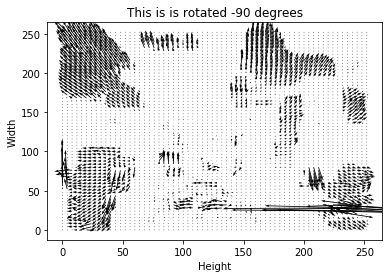

In [167]:
step = 4
ims = []
WIDTH = LENGTH = 256

X, Y = np.meshgrid(range(LENGTH), range(WIDTH))

U = flow[..., 0]
V = flow[..., 1]
Q = plt.quiver(X[::step,::step],
              Y[::step,::step],
              U[::step,::step],
              V[::step,::step],
             angles="uv")
    
plt.title("This is is rotated -90 degrees")
plt.xlabel('Height')
plt.ylabel('Width')

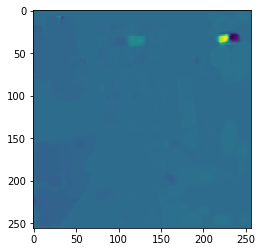

In [163]:
plt.imshow((flows[10][:,:,0]))

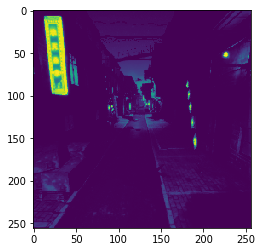

In [162]:
plt.imshow(im2)

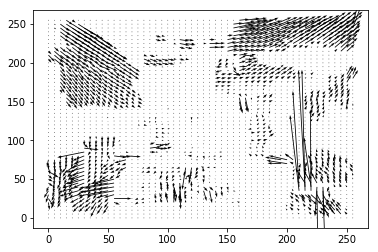

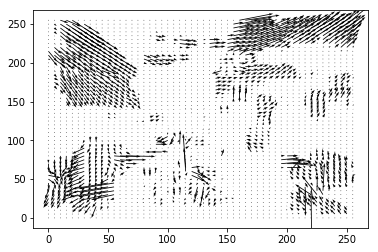

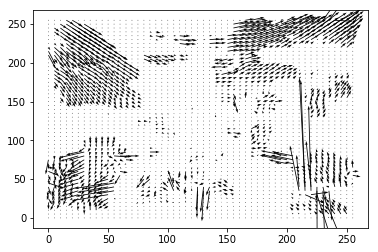

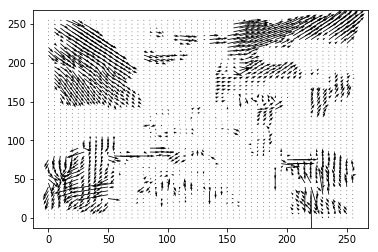

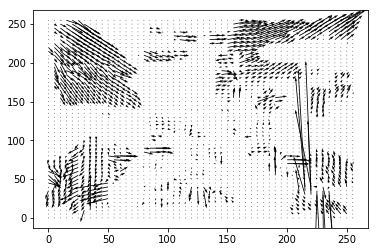

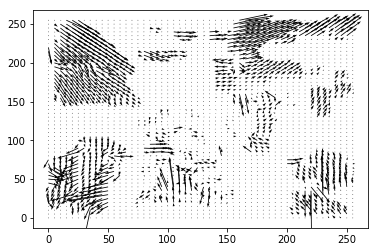

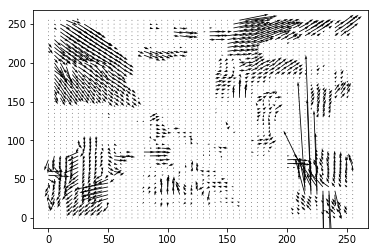

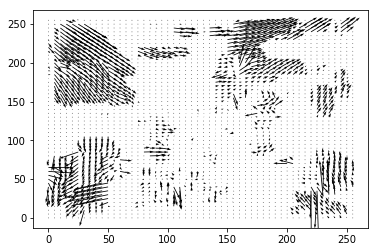

In [165]:
step = 5
ims = []
WIDTH = LENGTH = 256

X, Y = np.meshgrid(range(LENGTH), range(WIDTH))


for t in range(2,10):
    U = flows[t][..., 0]
    V = flows[t][..., 1]
    Q = plt.quiver(X[::step,::step],
                  Y[::step,::step],
                  U[::step,::step],
                  V[::step,::step],
                 angles="uv")
    
#     plt.imshow(imlist[t])

    plt.draw()
    plt.pause(0.1)